# Preparation

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Create Dummy Dataset

In [2]:
X, y = make_classification(
    n_samples=30, 
    n_features=2, 
    n_classes=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    shuffle=False
)

X = np.absolute(X)

X = np.round(X, 2) * 100

X = X.astype(int)

display(X)
display(y)

array([[ 59, 161],
       [ 82,  72],
       [127, 103],
       [ 70,  62],
       [110, 143],
       [ 56,  80],
       [ 19,  78],
       [ 37,  89],
       [118, 160],
       [ 60, 104],
       [152, 123],
       [156,  23],
       [126, 110],
       [143, 103],
       [ 22,  70],
       [143,   2],
       [ 55, 185],
       [167,  22],
       [ 72, 129],
       [113, 143],
       [ 98,  94],
       [148,  41],
       [  9, 183],
       [ 39, 101],
       [195,  87],
       [ 56, 121],
       [ 82,  53],
       [105,  97],
       [312, 112],
       [ 36,  13]])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1])

# Create Pandas DataFrame

In [3]:
y_new = y.reshape(len(y), 1)

data = np.concatenate((X, y_new), axis=1)

df = pd.DataFrame(data, columns=[
    'Fitur 1', 'Fitur 2', 'Label'
])

df.head(10)

,Fitur 1,Fitur 2,Label
0,59,161,0
1,82,72,0
2,127,103,0
3,70,62,0
4,110,143,0
5,56,80,0
6,19,78,0
7,37,89,0
8,118,160,1
9,60,104,1


# Labelling

In [4]:
df_new = df.copy()

# mapping label
df_new['Label'] = df_new['Label'].map({
    1 : 'Kelas A',
    0 : 'Kelas B'
})

df_new.head(10)

,Fitur 1,Fitur 2,Label
0,59,161,Kelas B
1,82,72,Kelas B
2,127,103,Kelas B
3,70,62,Kelas B
4,110,143,Kelas B
5,56,80,Kelas B
6,19,78,Kelas B
7,37,89,Kelas B
8,118,160,Kelas A
9,60,104,Kelas A


# Data Visualization

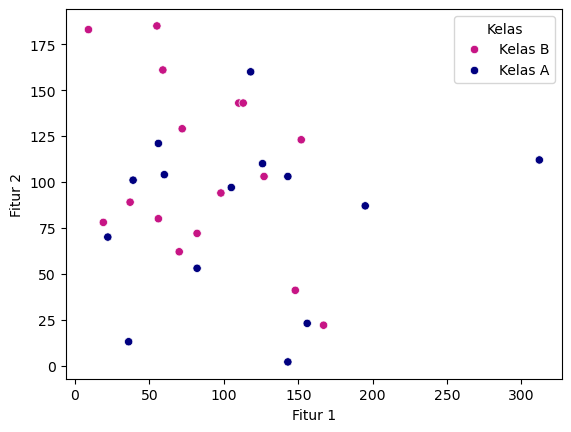

In [5]:
# Grouping based on label
groups = df_new.groupby('Label')
class_a = groups.get_group('Kelas A')
class_b = groups.get_group('Kelas B')

# Plot
sns.scatterplot(
    data=df_new, 
    x='Fitur 1', 
    y='Fitur 2',
    hue='Label', 
    palette=['MediumVioletRed', 'Navy']
)
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(title='Kelas')
plt.show()

# Split Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Model Multinomial Naive Bayes

In [7]:
mnb = MultinomialNB().fit(X_train, y_train)

# Evaluate model on train and test data
for name, X, y in [("train", X_train, y_train), ("test", X_test, y_test)]:
    acc = accuracy_score(y, mnb.predict(X))
    print(f"Akurasi data {name}: {acc:.4f}")

Akurasi data train: 0.5714
Akurasi data test: 0.6667


# Model Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)

# Evaluate model on train and test data
for name, X, y in [("train", X_train, y_train), ("test", X_test, y_test)]:
    accuracy = accuracy_score(y, gnb.predict(X))
    print(f"Akurasi data {name}: {accuracy:.4f}")

Akurasi data train: 0.6667
Akurasi data test: 0.4444


# Conclusion

Hasil yang diperoleh tidak begitu jauh, namun sekilas model multinomial naive bayes cenderung memiliki hasil yang lebih bagus pada data testing, data yang belum pernah diketahui polanya sebelumnya, yang ditunjukkan dengan skor $0.667$ pada data test dan dibandingkan dengan $0.5714$ pada data training. Hal ini berbeda dengan model gaussian yang cenderung memiliki performa lebih baik pada data training yang ditunjukkan dengan skor $0.6667$ dan dibandingkan dengan skor $0.444$ pada data testing. Perbedaan hasil ini biasanya disebabkan dari pola persebaran data yang ada. 

Jika dilihat pada [Data visualiazation](#data-visualization), terlihat bahwa data memang cenderung terbentuk secara lebih acak dengan tidak menunjukkan kecenderungan pola tertentu. Model multinomial naive bayes biasanya lebih cocok pada data diskrit dan juga data yang memiliki nilai non-negatif. Contoh data seperti ini adalah data kategorikal. Sedangkan untuk model gaussian, model ini lebih cocok pada jenis pola data yang memiliki sifat kontinu atau berkelanjutan dan juga terdistribusi normal. 